### Tabela de Atributos da Pesquisa

| **Variável**                       | **Tipo**       | **Descrição**                                                                      |
|-----------------------------------|----------------|------------------------------------------------------------------------------------|
| Idade                             | Inteiro        | Idade em anos                                                                      |
| Gênero                            | Categórico     | Macho ou fêmea                                                                     |
| Nível acadêmico                   | Categórico     | Ensino Médio / Graduação / Pós-Graduação                                           |
| País                              | Categórico     | País de Residência                                                                 |
| Horas_Média_de_Uso_Diário         | Flutuador      | Média de horas por dia nas redes sociais                                           |
| Plataforma_mais_usada            | Categórico     | Instagram, Facebook, TikTok, etc.                                                  |
| Afeta o desempenho acadêmico      | Booleano       | Impacto auto-relatado nos estudos (Sim/Não)                                        |
| Horas_de_sono_por_noite           | Flutuador      | Média de horas de sono noturno                                                     |
| Pontuação de Saúde Mental         | Inteiro        | Autoavaliação da saúde mental (1 = ruim a 10 = excelente)                          |
| Status de relacionamento          | Categórico     | Solteiro / Em um relacionamento / Complicado                                       |
| Conflitos_nas_Mídias_Sociais      | Inteiro        | Número de conflitos de relacionamento devido às mídias sociais                     |
| Pontuação_viciada                 | Inteiro        | Pontuação de vício em mídia social (1 = baixo a 10 = alto)                         |


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")   

In [2]:
df = pd.read_csv("Students Social Media Addiction.csv")

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.shape

(705, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [6]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [7]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [8]:
df.drop(columns=["Student_ID"], inplace=True)

# EDA

## Numéricas

In [9]:
numericas = df.select_dtypes(include=["number"]).columns

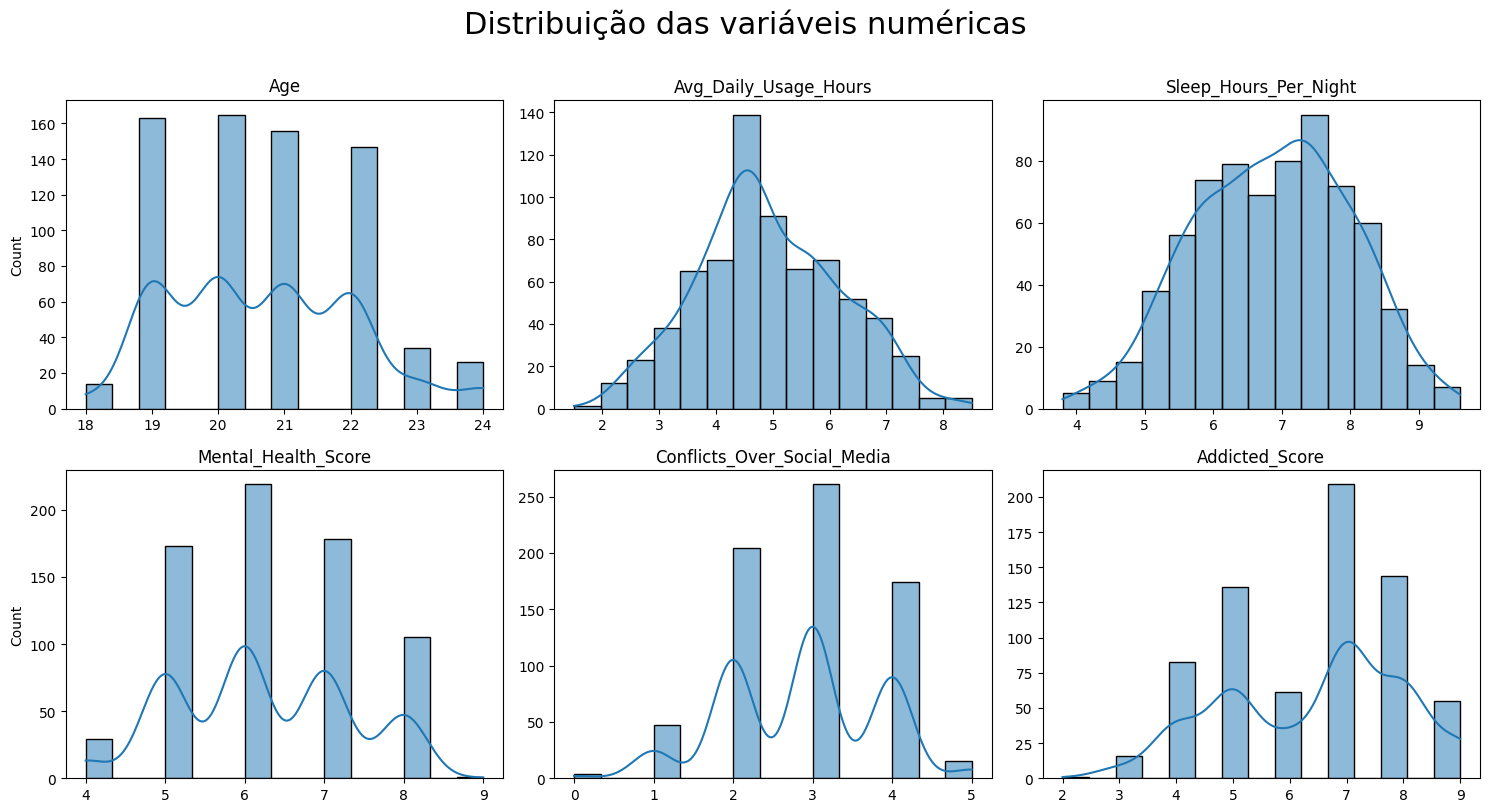

In [10]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax = ax.flatten()

for i, col in enumerate(numericas):
    sns.histplot(df[col], ax=ax[i], kde=True, bins=15)
    ax[i].set_title(f"{col}")
    
    ax[i].set_xlabel("")
    if i not in[0, 3]:
        ax[i].set_ylabel("")

plt.suptitle("Distribuição das variáveis numéricas", fontsize=22, y=1.01)
plt.tight_layout()
plt.show()

## Categóricas

In [11]:
categoricas = df.select_dtypes(exclude=["number"]).columns

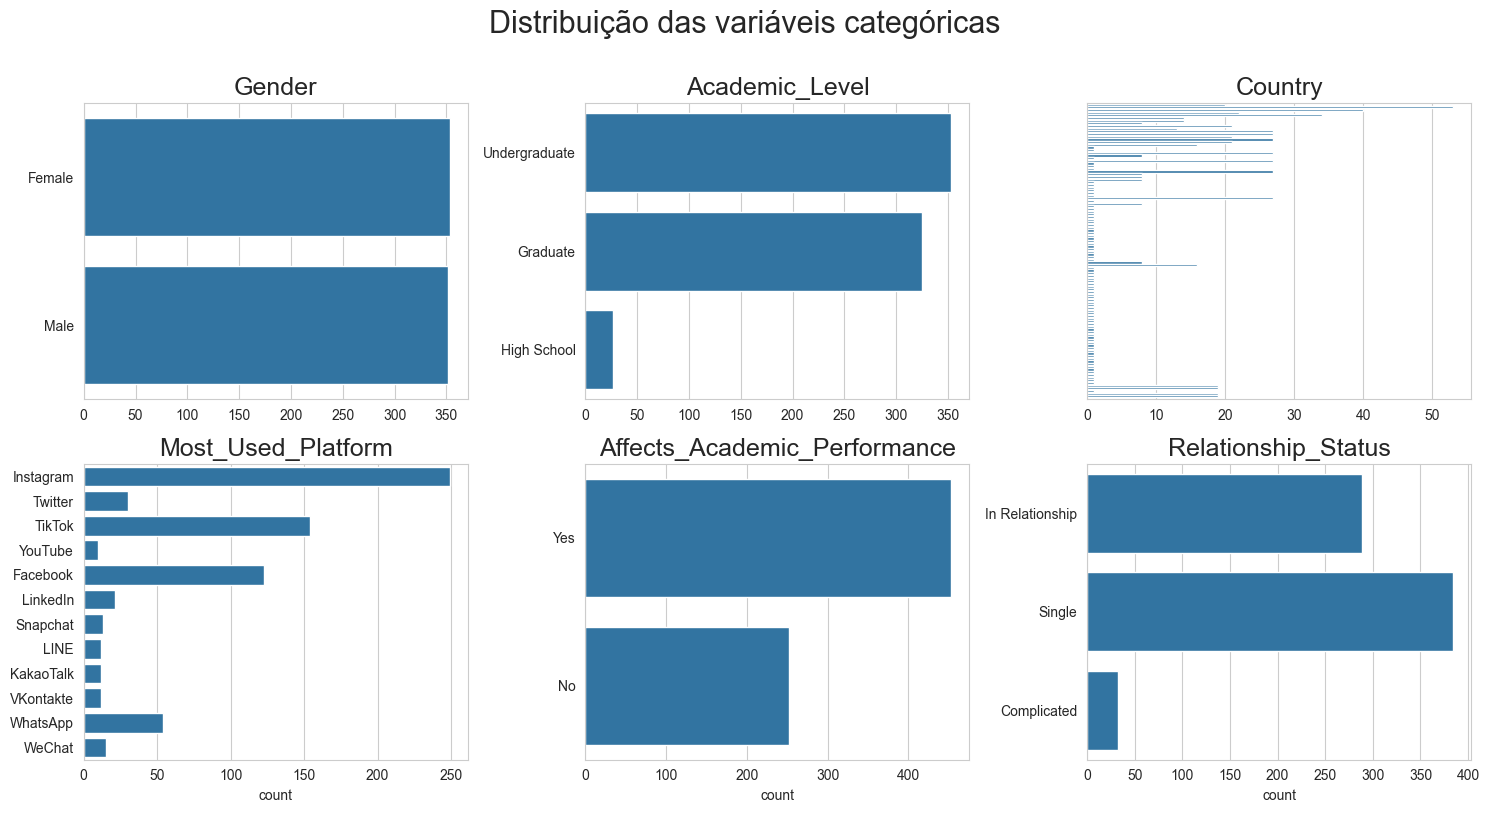

In [128]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax = ax.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(df, y=col, ax=ax[i])
    ax[i].set_title(f"{col}", fontsize=18)
    
    ax[i].set_ylabel("")
    if col == "Country":
        ax[i].set_yticks("")
        
    if i not in [3, 4, 5]:
        ax[i].set_xlabel("")
        
for i in range(len(categoricas), len(ax)):
    fig.delaxes(ax[i])

plt.suptitle("Distribuição das variáveis categóricas", fontsize=22, y=1.01)
plt.tight_layout()
plt.show()

## Como o Tempo de Uso e o Gênero Influenciam a Saúde Mental

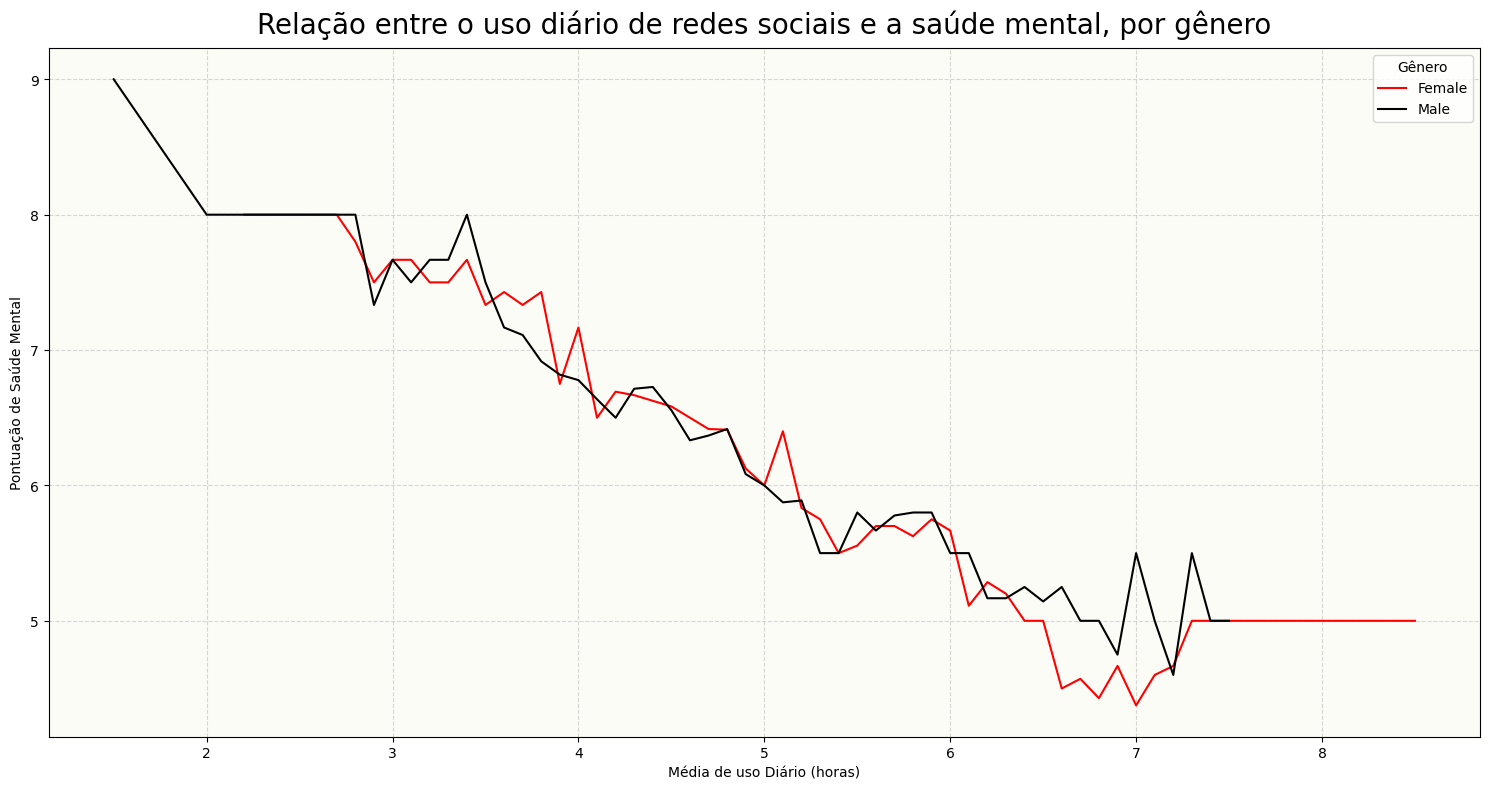

In [13]:
plt.figure(figsize=(15, 8))

custom_palette = {"Male": "black", "Female": "red"}
ax = sns.lineplot(df, x="Avg_Daily_Usage_Hours", y="Mental_Health_Score", hue="Gender", palette=custom_palette, errorbar=None)

plt.title("Relação entre o uso diário de redes sociais e a saúde mental, por gênero", fontsize=20, y=1.01)
plt.xlabel("Média de uso Diário (horas)")
plt.ylabel("Pontuação de Saúde Mental")

plt.grid(linestyle="--", alpha=0.5)
ax.set_facecolor("#f5f5dc37")  

plt.legend(title="Gênero", loc="upper right") 
plt.tight_layout()
plt.show()

Observa-se uma correlação negativa entre o uso diário das redes sociais e a saúde mental. Ou seja, quanto maior o tempo de uso diário, menor tende a ser a pontuação de saúde mental dos indivíduos. Esse padrão é evidente tanto em pessoas do sexo masculino quanto feminino, indicando que o impacto negativo do uso excessivo das redes sociais na saúde mental afeta ambos os gêneros de forma semelhante.

## Vício em Redes Sociais: Reflexos no Uso Diário e no Sono

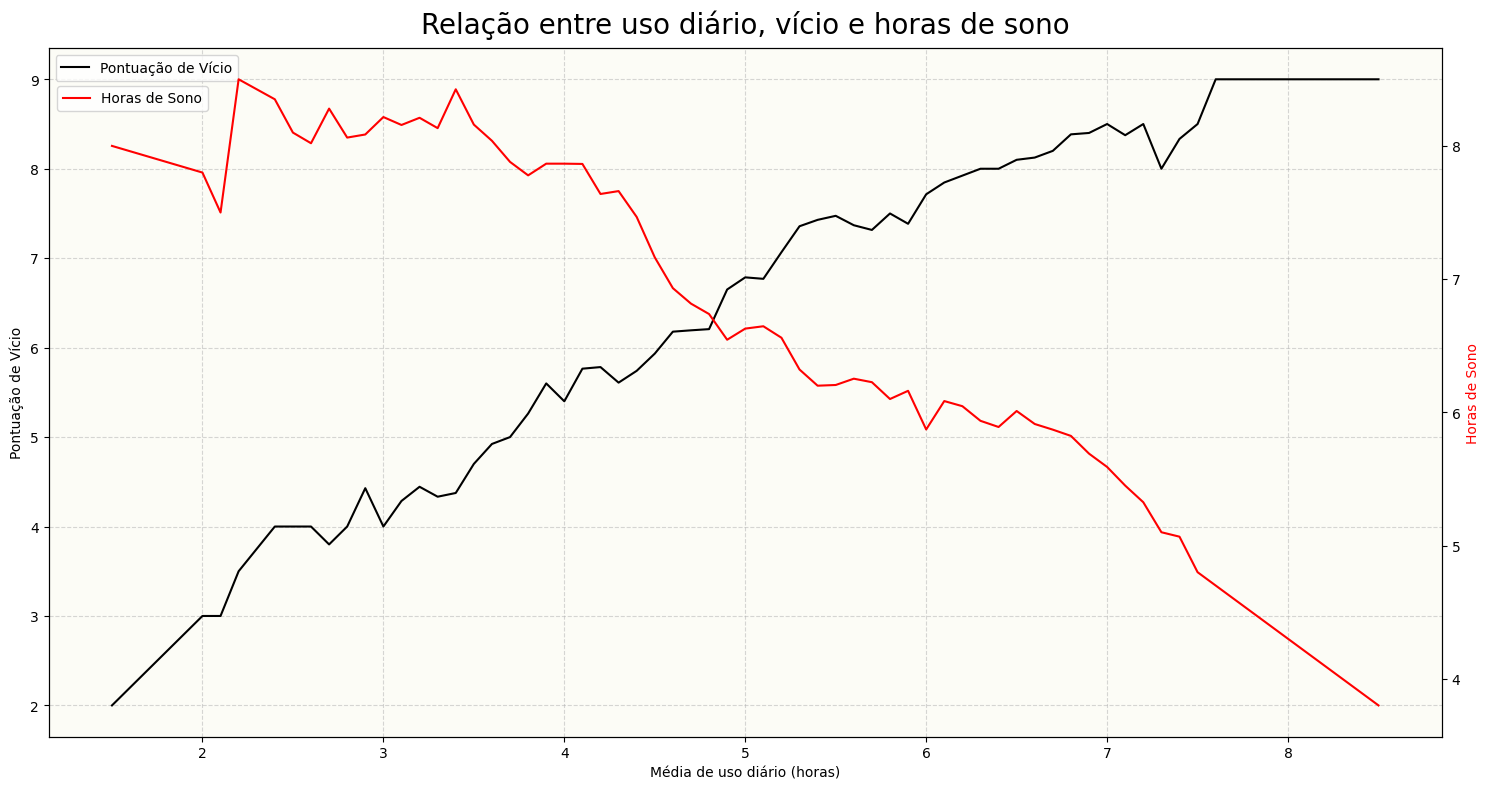

In [14]:
fig, ax1 = plt.subplots(figsize=(15,8))

sns.lineplot(df, x="Avg_Daily_Usage_Hours", y="Addicted_Score", color="black", ax=ax1, errorbar=None, label="Pontuação de Vício")
ax1.set_ylabel("Pontuação de Vício", color="black")

ax2 = ax1.twinx()
sns.lineplot(df, x="Avg_Daily_Usage_Hours", y="Sleep_Hours_Per_Night", color="red", ax=ax2, errorbar=None, label="Horas de Sono")
ax2.set_ylabel("Horas de Sono", color="red")

ax1.set_title("Relação entre uso diário, vício e horas de sono", fontsize=20, y=1.01)
ax1.set_xlabel("Média de uso diário (horas)")
ax1.grid(linestyle="--", alpha=0.5)
ax1.set_facecolor("#f5f5dc3e")

ax2.legend(loc="upper left", bbox_to_anchor=(0.001, 0.955))
plt.tight_layout()
plt.show()

Como esperado, ao analisar o gráfico, observa-se que quanto maior o tempo de uso diário das redes sociais, maior é a tendência do indivíduo a desenvolver comportamentos de vício e, consequentemente, dormir menos à noite.

## Impacto do Uso Excessivo e do Sono Reduzido no Rendimento Acadêmico

<Figure size 800x800 with 0 Axes>

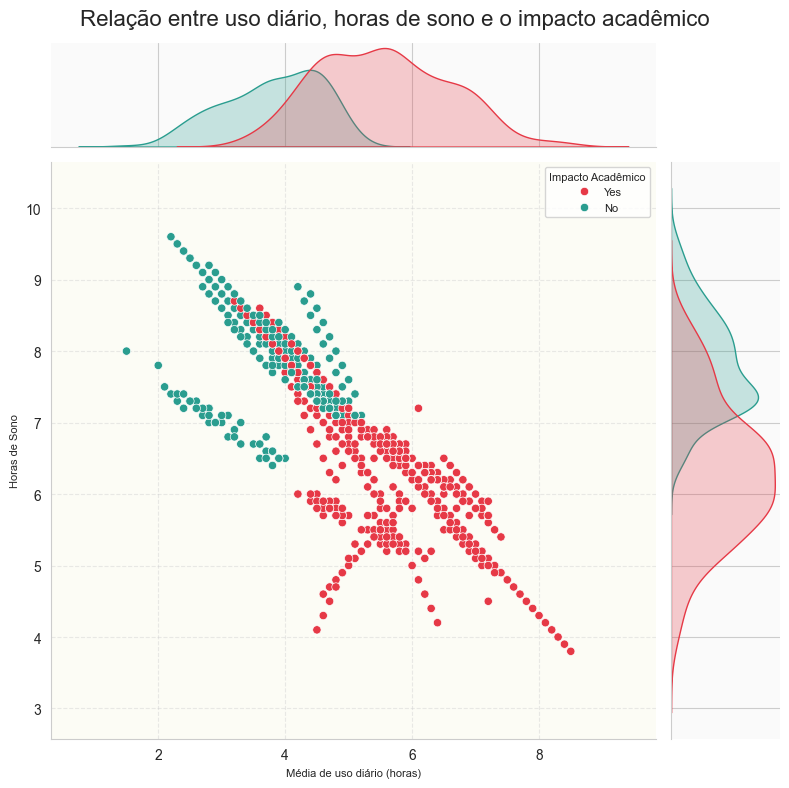

In [129]:
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

g = sns.jointplot(data=df, x="Avg_Daily_Usage_Hours", y="Sleep_Hours_Per_Night", hue="Affects_Academic_Performance", kind="scatter", palette={"Yes": "#e63946", "No": "#2a9d8f"}, height=8)

g.fig.suptitle("Relação entre uso diário, horas de sono e o impacto acadêmico", fontsize=16)
g.set_axis_labels("Média de uso diário (horas)", "Horas de Sono", fontsize=8)

g.ax_joint.set_facecolor("#f5f5dc43")  
g.ax_joint.grid(True, linestyle="--", alpha=0.4)

g.ax_marg_x.set_facecolor("#fafafa")
g.ax_marg_y.set_facecolor("#fafafa")

plt.legend(title="Impacto Acadêmico", loc="upper right", fontsize=8, title_fontsize=8)
plt.tight_layout()
plt.show()

Com base no gráfico, percebemos que estudantes que utilizam redes sociais por longos períodos e que dormem bastante tendem a ter um desempenho acadêmico mais afetado do que aqueles com hábitos mais equilibrados. Observa-se que indivíduos que dormem mais de 6 horas por noite e utilizam, em média, até 5 horas diárias de redes sociais geralmente não relatam grandes impactos acadêmicos. No entanto, quando o uso ultrapassa esse limite, mesmo mantendo um bom padrão de sono, o risco de prejuízo no desempenho aumenta. Embora existam exceções esses casos são minoria.

## A Influência das Plataformas Digitais na Intensidade do Vício

In [16]:
media_redes = df.groupby("Most_Used_Platform")["Addicted_Score"].mean().reset_index().sort_values(by="Addicted_Score", ascending=False)

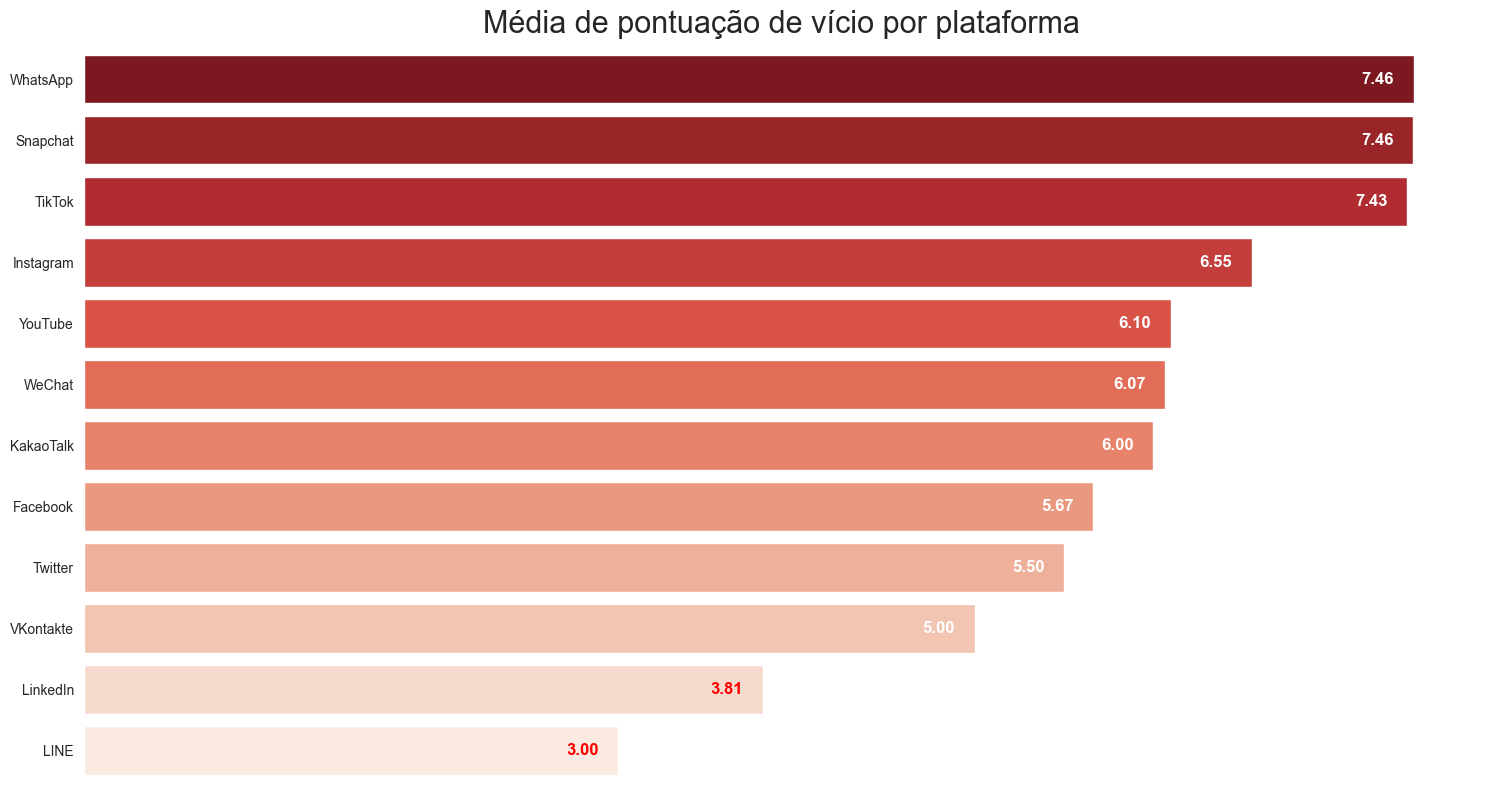

In [17]:
plt.figure(figsize=(15,8))
ax = sns.barplot(media_redes, y="Most_Used_Platform", x="Addicted_Score", errorbar=None, palette="Reds_r")
plt.title("Média de pontuação de vício por plataforma", fontsize=22, y=1.01)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_xticks([])
ax.set_frame_on(False)
ax.grid(False)
ax.set_facecolor('#f5f5dc')

for container in ax.containers:
    for bar in container:
        valor = bar.get_width()
        ax.text(valor - 0.2, bar.get_y() + bar.get_height() / 2, f"{valor:.2f}", ha="center", va="center", 
                color="white" if valor > 4 else "red", fontsize=12,  fontweight="bold")
        
plt.tight_layout()
plt.show()

Percebemos que as plataformas com maiores níveis médios de vício são o WhatsApp, Snapchat e TikTok, todas apresentando pontuações acima de 7 na escala de vício. Esses dados indicam que essas redes, geralmente mais dinâmicas e com forte apelo social e de entretenimento, estão mais associadas a comportamentos de uso excessivo. Por outro lado, plataformas como LinkedIn e LINE registraram as menores pontuações médias, todas abaixo de 4, sugerindo um uso mais moderado e funcional, possivelmente ligado a contextos profissionais ou menos imersivos.

## Influência do Gênero no Tempo de Uso das Redes Sociais por Plataforma

In [18]:
media_plataforma_genero = df.groupby(["Most_Used_Platform", "Gender"])["Avg_Daily_Usage_Hours"].mean().reset_index().sort_values(by="Avg_Daily_Usage_Hours", ascending=False) 

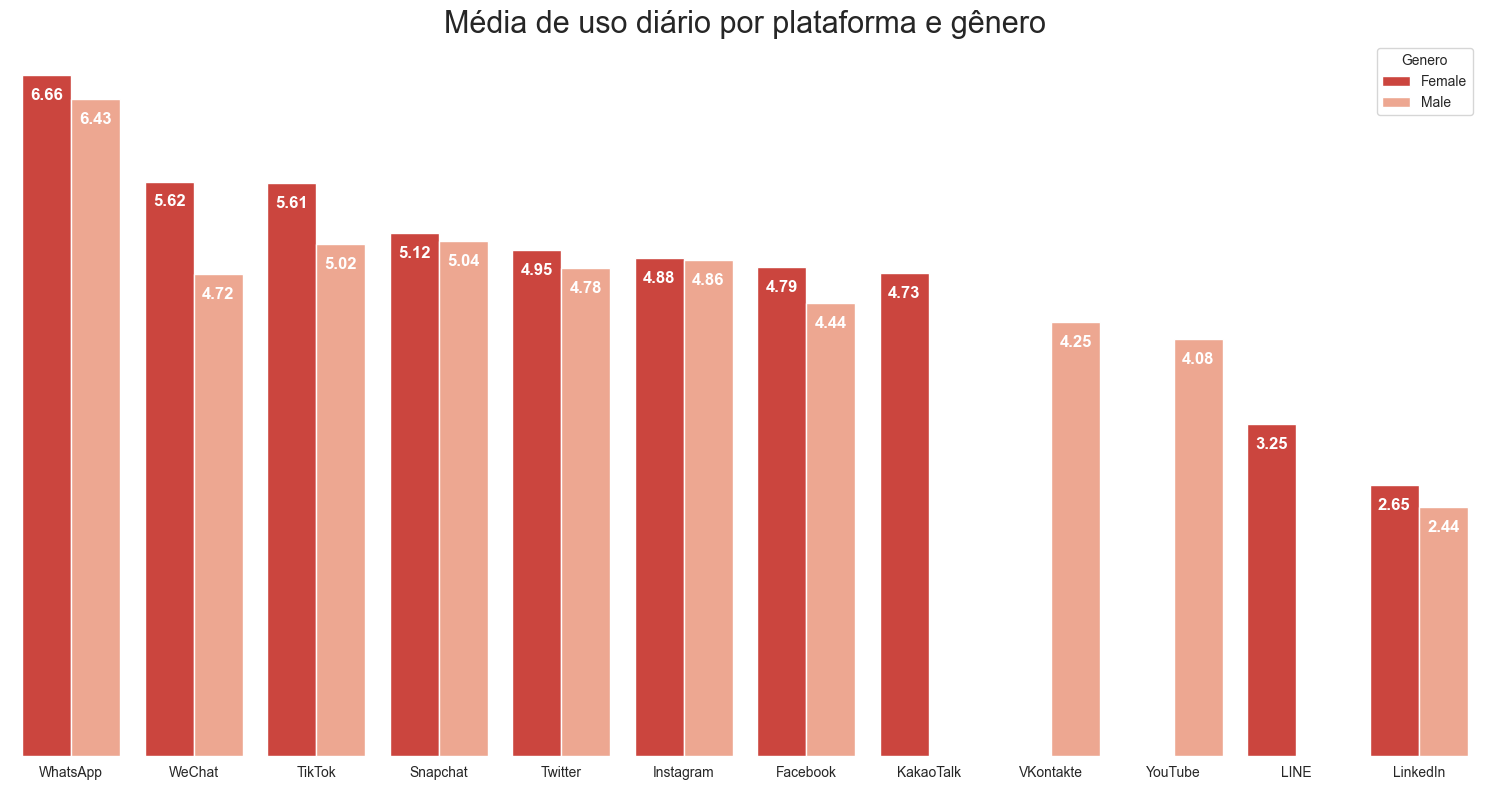

In [19]:
plt.figure(figsize=(15,8))
ax = sns.barplot(media_plataforma_genero, x="Most_Used_Platform", y="Avg_Daily_Usage_Hours", hue="Gender", errorbar=None, palette="Reds_r")
plt.title("Média de uso diário por plataforma e gênero", fontsize=22)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])
ax.set_frame_on(False)
ax.grid(False)
ax.set_facecolor('#f5f5dc')

for container in ax.containers:
    for bar in container:
        valor = bar.get_height()
        ax.text( bar.get_x() + bar.get_width() / 2, valor - 0.2,f"{valor:.2f}", ha="center", va="center", 
                color="white", fontsize=12,  fontweight="bold")

plt.legend(title="Genero")
plt.tight_layout()
plt.show()

Observamos que o tempo médio de uso diário das redes sociais é bastante semelhante entre homens e mulheres, indicando padrões de comportamento digital próximos entre os gêneros. No entanto, algumas plataformas apresentam uso exclusivo ou majoritário de um dos gêneros. Por exemplo, plataformas como VKontakte e YouTube aparecem sendo utilizadas apenas por homens na amostra analisada, enquanto Kakao Talk e LINE são utilizadas apenas por mulheres. Ainda assim, nas plataformas utilizadas por ambos os gêneros, o tempo médio de uso se mantém equilibrado, sem grandes diferenças entre homens e mulheres.

## Diferenças Internacionais e nos Níveis de Vício em Redes Sociais

In [20]:
top_paises = df.groupby("Country")["Addicted_Score"].mean().reset_index().sort_values(by="Addicted_Score", ascending=False).head(10)
last_paises = df.groupby("Country")["Addicted_Score"].mean().reset_index().sort_values(by="Addicted_Score", ascending=False).tail(10)

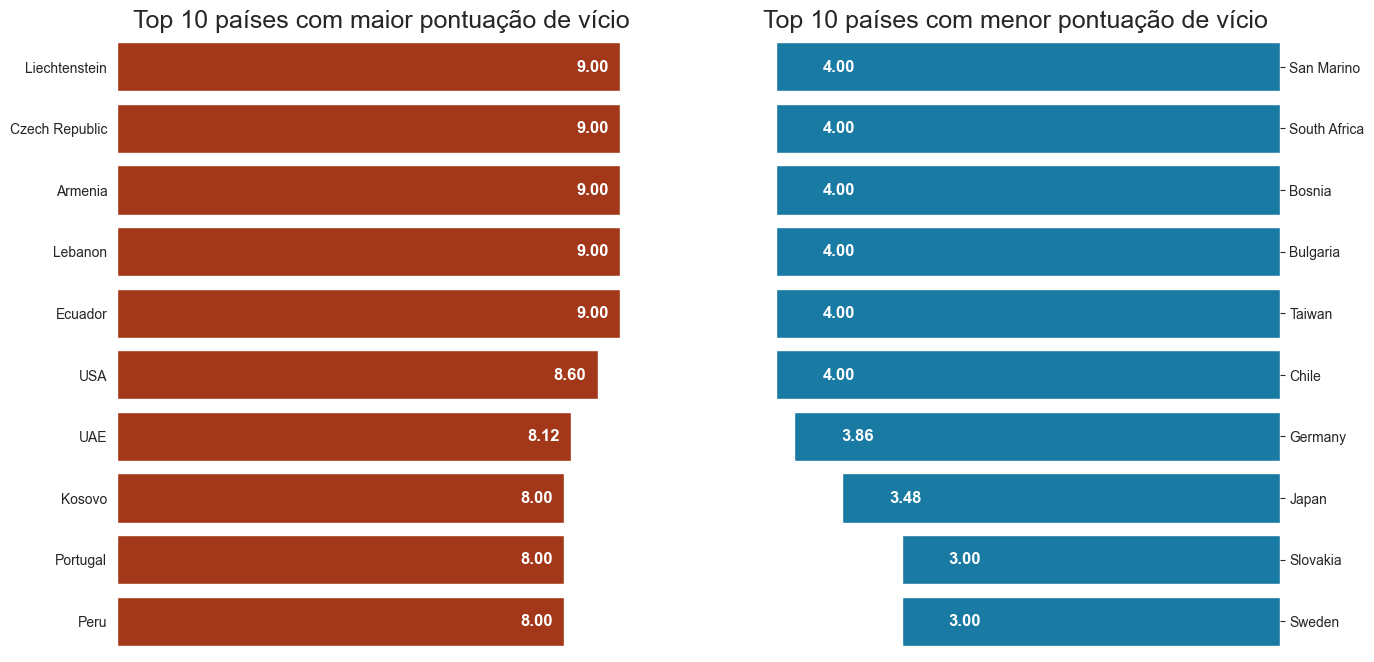

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,8))

sns.barplot(top_paises, y="Country", x="Addicted_Score",  ax=ax[0], color="#BA2A02")   
ax[0].set_title("Top 10 países com maior pontuação de vício", fontsize=18)  
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_xticks([])
ax[0].set_frame_on(False)
for container in ax[0].containers:
    for bar in container:
        valor = bar.get_width()
        ax[0].text(valor - 0.5, bar.get_y() + bar.get_height() / 2, f"{valor:.2f}", ha="center", va="center", 
                color="white", fontsize=12,  fontweight="bold")
        
sns.barplot(last_paises, y="Country", x="Addicted_Score", errorbar=None, color="#0283BA", ax=ax[1]) 
ax[1].set_title("Top 10 países com menor pontuação de vício", fontsize=18)  
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_xticks([])
ax[1].set_frame_on(False)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
for container in ax[1].containers:
    for bar in container:
        valor = bar.get_width()
        ax[1].text(valor - 0.5, bar.get_y() + bar.get_height() / 2, f"{valor:.2f}", ha="center", va="center", 
                color="white", fontsize=12,  fontweight="bold")  

Países como Liechtenstein, Armênia e EUA apresentam os maiores níveis de vício em redes sociais, com pontuação média muito alta, enquanto Suécia, Japão e Alemanha estão entre os menos viciados. Isso indica diferenças culturais e de comportamento digital entre as nações, sugerindo que alguns países têm maior equilíbrio no uso das redes sociais que outros.

## Impacto do Uso das Redes Sociais nas Relações e Conflitos Pessoais

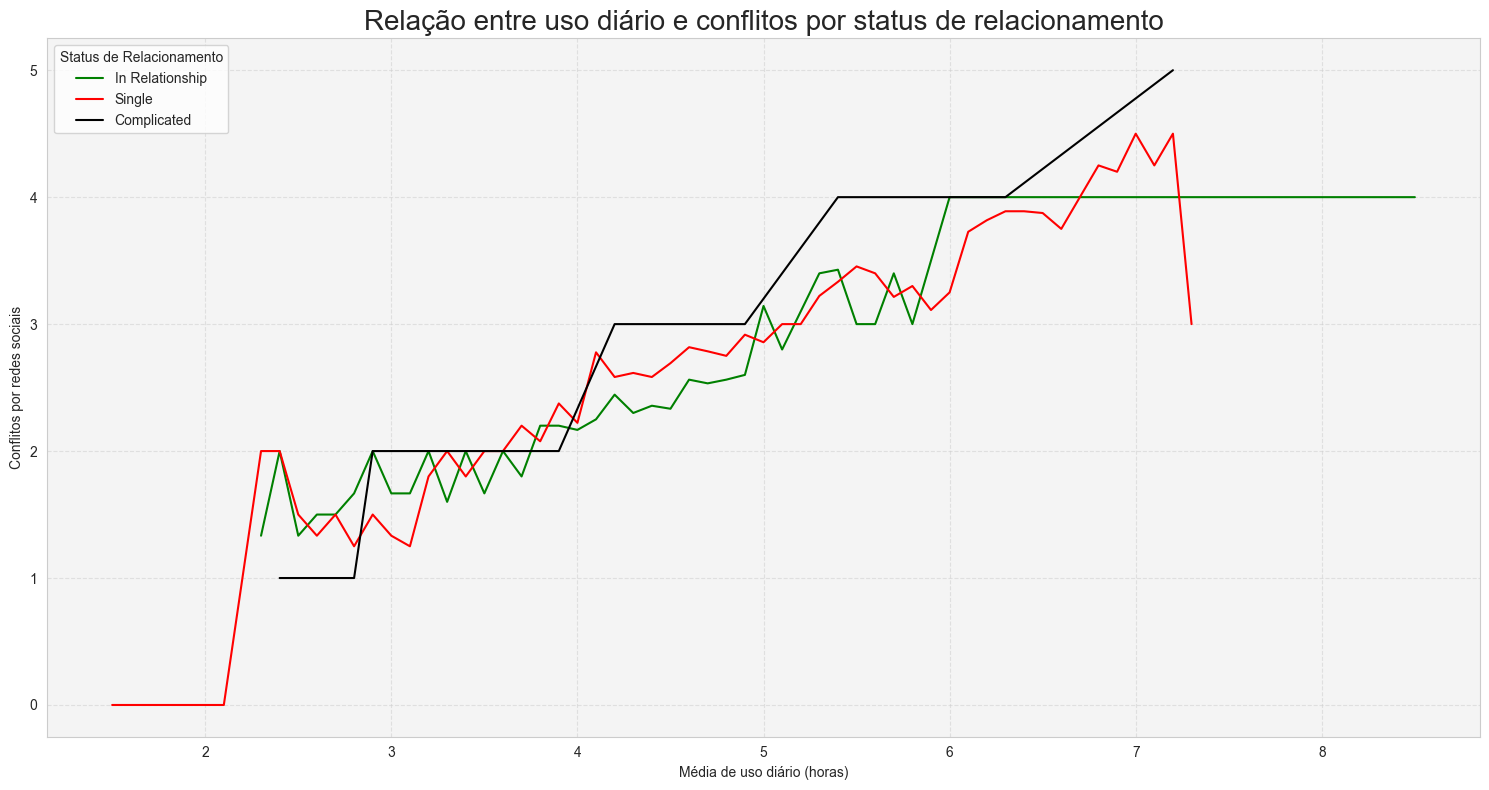

In [22]:
custom_palette = {"Single": "red", "In Relationship": "green", "Complicated":"black"}
plt.figure(figsize=(15,8))
ax = sns.lineplot(df, x="Avg_Daily_Usage_Hours", y="Conflicts_Over_Social_Media", hue="Relationship_Status", errorbar=None, palette=custom_palette)
plt.title("Relação entre uso diário e conflitos por status de relacionamento", fontsize=20)
plt.xlabel("Média de uso diário (horas)")
plt.ylabel("Conflitos por redes sociais")
plt.grid(linestyle="--", alpha=0.5)
ax.set_facecolor("#0407070B")
plt.legend(title="Status de Relacionamento", loc="upper left") 
plt.tight_layout()
plt.show()

Percebemos que uanto maior o uso diário de redes sociais, maior a propensão a conflitos. Todos os status de relacionamento mostram aumento nos conflitos com o uso, mas o status 'complicado' se destaca com uma tendência acentuada de crescimento, sem quedas, indicando maior vulnerabilidade nesse grupo.

## A Influência dos Conflitos Online na Saúde Mental de Homens e Mulheres

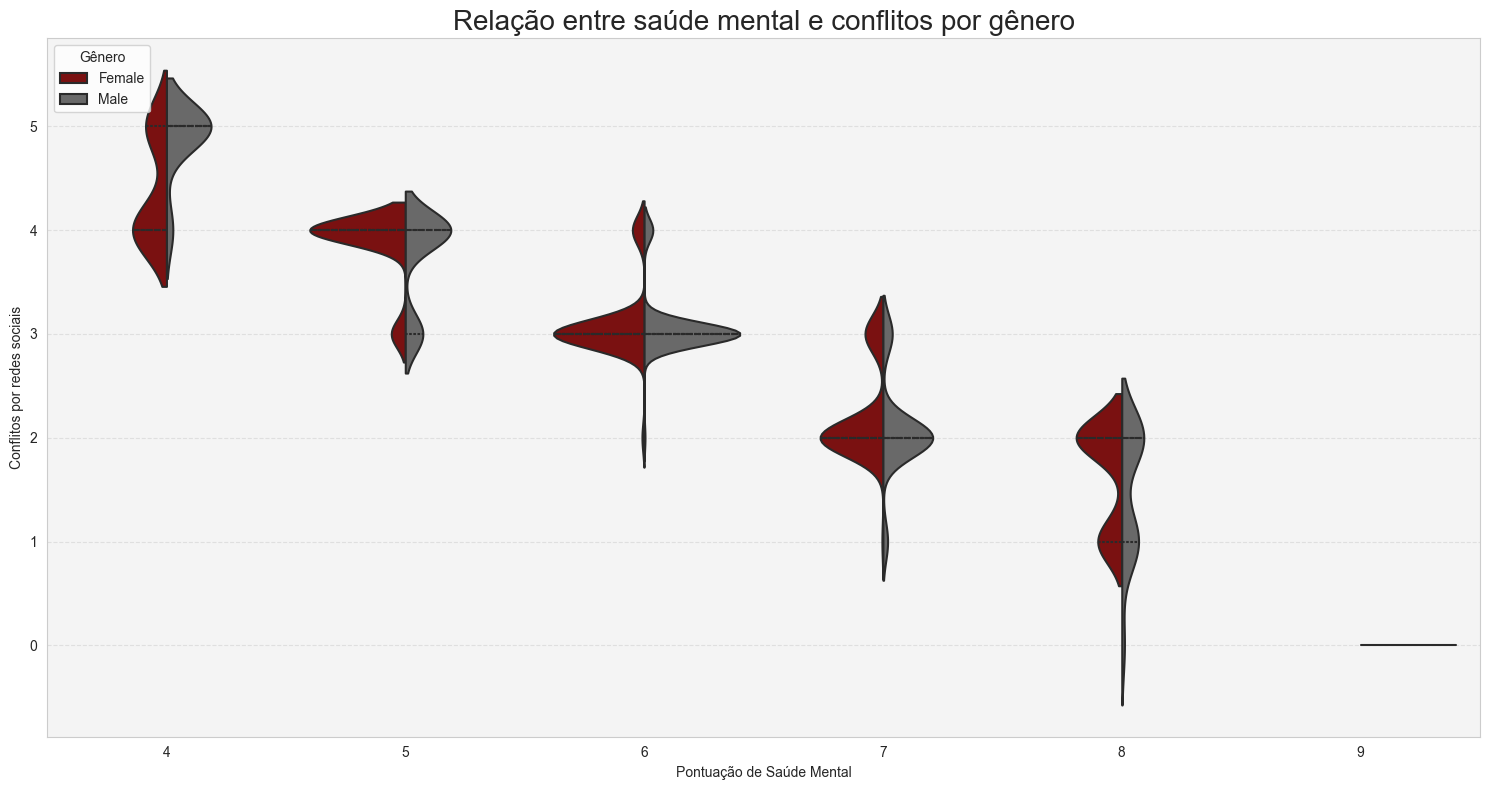

In [23]:
plt.figure(figsize=(15, 8))
ax = sns.violinplot(data=df, x="Mental_Health_Score", y="Conflicts_Over_Social_Media", hue="Gender", palette=["#8B0000", "#696969"], split=True, inner="quartile", linewidth=1.5)

plt.title("Relação entre saúde mental e conflitos por gênero", fontsize=20)
plt.xlabel("Pontuação de Saúde Mental")
plt.ylabel("Conflitos por redes sociais")
plt.grid(axis='y', linestyle="--", alpha=0.5)

ax.set_facecolor("#0407070B") 
plt.legend(title="Gênero", loc="upper left")
plt.tight_layout()
plt.show()

Observa-se que indivíduos com melhor pontuação de saúde mental apresentam uma maior tendência a se envolver em conflitos relacionados às redes sociais. Além disso, o gênero não parece ser um fator determinante nesse padrão de comportamento

## Relação entre Escolaridade e os Efeitos do Uso de Redes Sociais

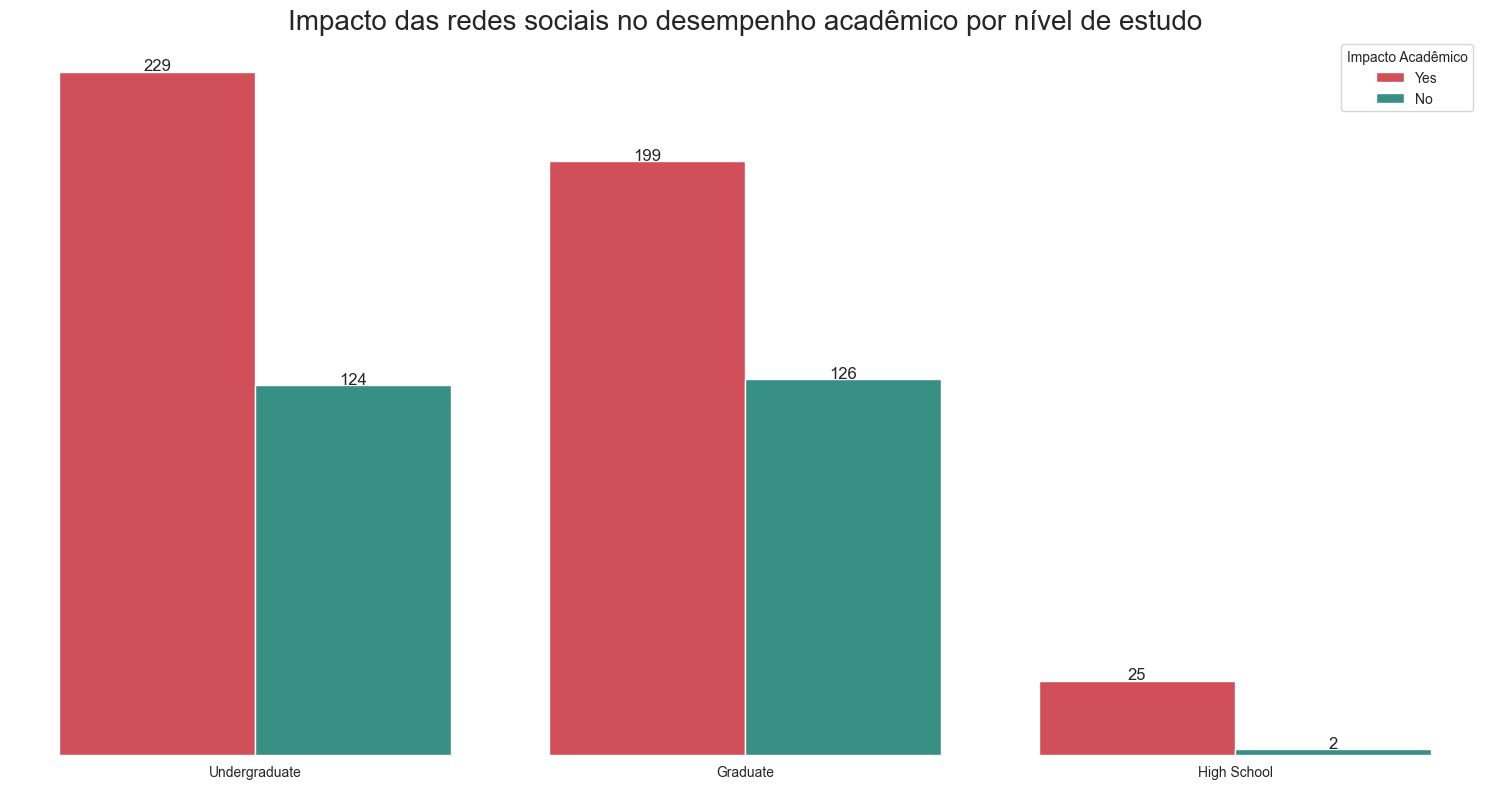

In [106]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(df, x="Academic_Level", hue="Affects_Academic_Performance", palette={"Yes": "#e63946", "No": "#2a9d8f"})
plt.title("Impacto das redes sociais no desempenho acadêmico por nível de estudo", fontsize=20)
plt.xlabel("")
plt.ylabel("")
ax.set_yticks([])
ax.set_frame_on(False)
plt.grid(axis='y', linestyle="--", alpha=0.5)

for container in ax.containers:
    for bar in container:
        valor = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() /2, valor + 2,
                f"{valor:.0f}", ha="center", va="center", fontsize=12)
        
        
plt.legend(title="Impacto Acadêmico", loc="upper right")
plt.tight_layout()
plt.show()  

Observa-se que estudantes com níveis acadêmicos mais avançados, como os de graduação e pós-graduação, relatam um impacto mais negativo das redes sociais em seu desempenho acadêmico, quando comparados a estudantes do ensino médio. Uma possível explicação para essa diferença é o fato de que universitários tendem a ter maior autonomia, sem a supervisão constante dos pais, o que pode favorecer um uso mais intenso e desregulado das redes sociais.

## Construção de um Perfil de Risco e Análise do Impacto na Saúde Mental e Desempenho Acadêmico
> Perfil de risco definido por:

- Uso intenso das redes sociais

- Baixa quantidade de horas de sono

- Frequência elevada de conflitos sociais

- Alto nível de dependência em redes sociais

In [ ]:
def classificar_perfil_de_risco(row):
    return (
        row["Avg_Daily_Usage_Hours"] > 5 and
        row["Sleep_Hours_Per_Night"] < 6 and
        row["Conflicts_Over_Social_Media"] >= 3 and
        row["Addicted_Score"] > 5
    )
df["Risk_Profile"] = df.apply(classificar_perfil_de_risco, axis=1)


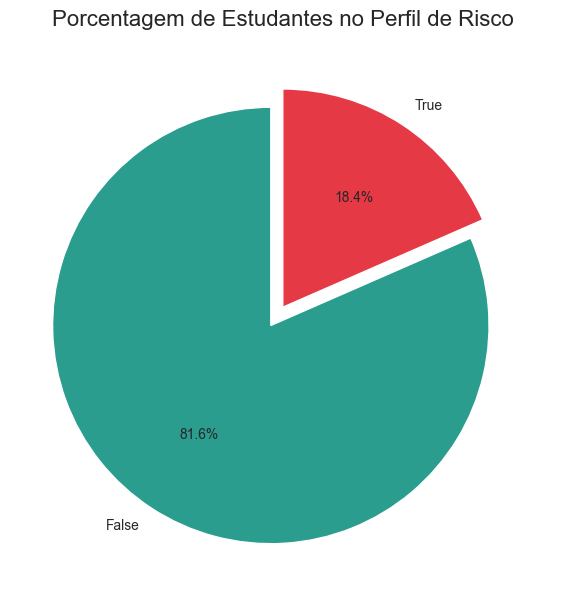

In [109]:
df.Risk_Profile.value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 6), colors=["#2a9d8f", "#e63946"], startangle=90, explode=[0.1, 0])
plt.title("Porcentagem de Estudantes no Perfil de Risco", fontsize=16)
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.show()

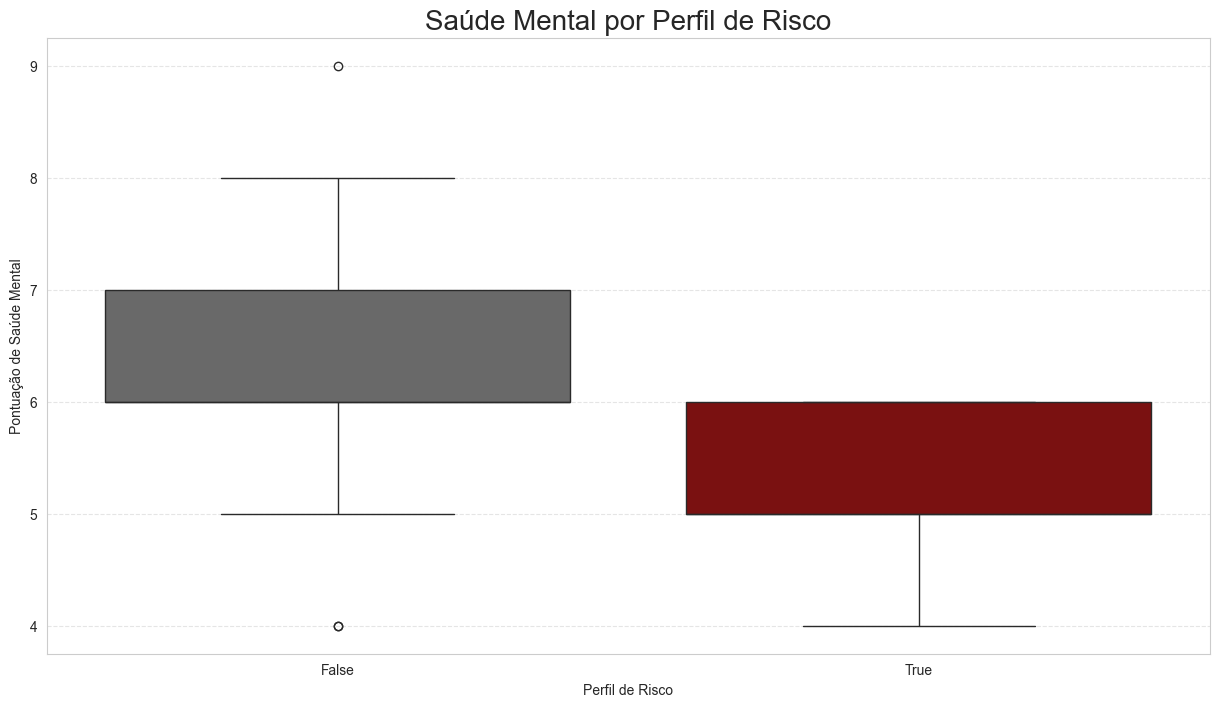

In [127]:
plt.figure(figsize=(15,8))
sns.boxplot(df, x="Risk_Profile", y="Mental_Health_Score", palette=["#696969", "#8B0000"])
plt.title("Saúde Mental por Perfil de Risco", fontsize=20)
plt.xlabel("Perfil de Risco")
plt.ylabel("Pontuação de Saúde Mental")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

Vemos que indivíduos classificados dentro do perfil de risco apresentam, surpreendentemente, pontuações de saúde mental mais altas do que aqueles que não se enquadram nesse perfil.

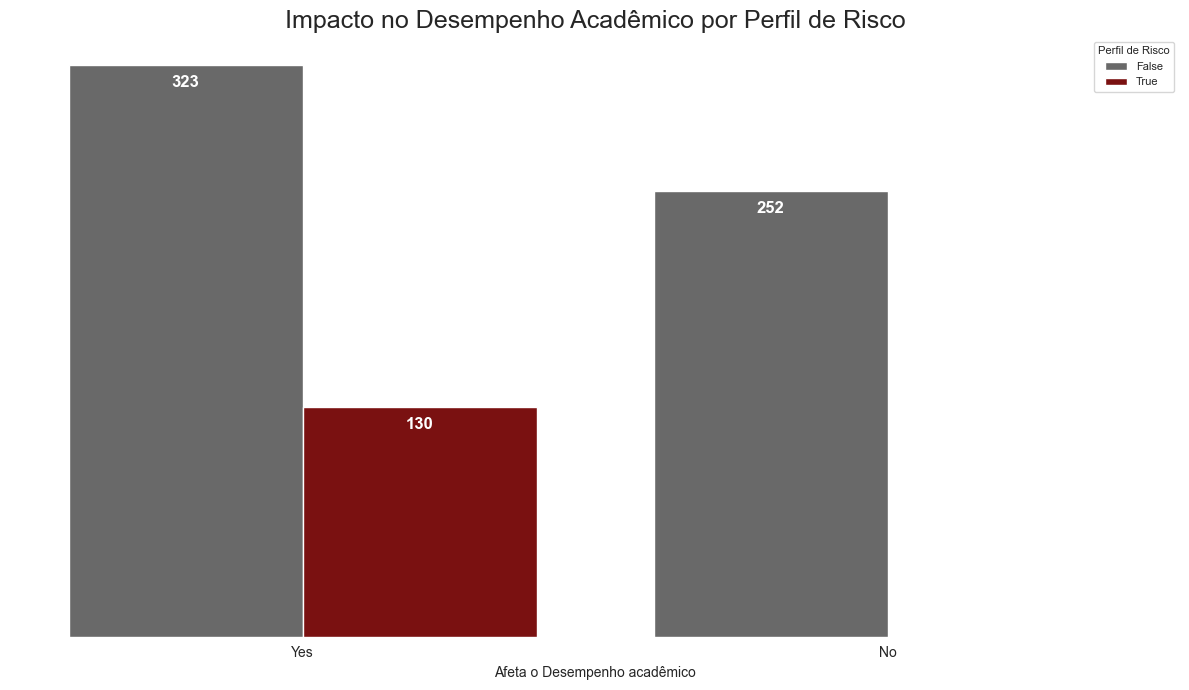

In [130]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x="Affects_Academic_Performance", hue="Risk_Profile", palette=["#696969", "#8B0000"])
plt.title("Impacto no Desempenho Acadêmico por Perfil de Risco", fontsize=18)
plt.xlabel("Afeta o Desempenho acadêmico")
plt.ylabel("")
ax.set_frame_on(False)
ax.set_yticks([])
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.legend(title="Perfil de Risco", fontsize=8, title_fontsize=8)

for container in ax.containers:
    for bar in container:
        valor = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() /2, valor - 10,
                f"{valor:.0f}", ha="center", va="center", fontsize=12, color="white", fontweight="bold")
  
plt.tight_layout()
plt.show()

Percebe-se que todas as pessoas enquadradas no perfil de risco relatam impacto negativo no desempenho acadêmico, indicando uma forte associação entre esse perfil comportamental e dificuldades no ambiente educacional. Isso pode estar relacionado a práticas constantes que não favorecem o aprendizado, como o uso excessivo de redes sociais, sono inadequado, entre outras atitudes que certamente prejudicam o rendimento dos estudantes.